**Time Series**: data that's measured over many points in time

**Fixed Frequency**: data points that occur at regular intervals according to some rule (weekly, monthly, etc.)

**Irregular Frequency**: Without a fixed unit or time between units. 

Types of Time Series data:

- Timestamps: specific instants in time

- Fixed periods: such as the full month "January 2017" or full year "2016"

- Intervals of time: Indicated by a start and end timestamp interval

- Elapsed Time: A measure of time relative to a particular start time. 

### Date and Time Data Types and Tools

Python standard library includes data types for date and time data. The `datetime, time, calendar` modules are the main places to start. 

In [2]:
from datetime import datetime

# datetime.datetime stores the date and time down to the microsecond

now=datetime.now()
print now
print now.year
print now.month
print now.day
print now.second
print now.microsecond

2017-08-23 12:15:07.152000
2017
8
23
7
152000


In [3]:
# datetime.timedelta = the difference between 2 datetime objects

delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)

print delta # difference in days, seconds
print delta.days
print delta.seconds

926 days, 15:45:00
926
56700


In [4]:
# We can add/subtract/multiple a timedelta with another datetime object:

from datetime import timedelta

start=datetime(2011,1,7)

print start + timedelta(12) # add 12 days

print start - 2 * timedelta(12)  # minus 24 days

2011-01-19 00:00:00
2010-12-14 00:00:00


#### Converting between string and datatime

`datetime` objects and pandas `Timestamp` objects, can be formatted as strings using `str` or the `strftime` method, passing a format specification:

In [5]:
stamp = datetime(2011,1,3)

print str(stamp)
print stamp.strftime('%m-%d-%Y')

2011-01-03 00:00:00
01-03-2011


Convert strings to dates using `datetime.strptime`

In [6]:
value = '2011-01-03'

print datetime.strptime(value,'%Y-%m-%d') # Convert value to datetime in the following format: YYYY-MM-DD

datestrs=['7/6/2011','8/6/2011']
print [datetime.strptime(x,'%m/%d/%Y') for x in datestrs] # for each date in datestrs, apply datetime.strptime

2011-01-03 00:00:00
[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]


We can also use `parser.parse` method from `dateutil` package to parse dates intelligently:

In [7]:
from dateutil.parser import parse

print [parse(x) for x in datestrs]
print parse('2011-01-03')
print parse('Jan 31, 1997 10:45 PM')
print parse('31/12/2011', dayfirst=True)  # For european dates

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]
2011-01-03 00:00:00
1997-01-31 22:45:00
2011-12-31 00:00:00


`pd.to_datetime(array)` parses many different kind of date representations

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

% matplotlib inline

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [9]:
# Also handles missing values, NaT = Not a time or pandas's NA value for timestamp data
datestrs = datestrs + [''] # Adding a null value
idx=pd.to_datetime(datestrs + [None]) # Adding another null value

print idx

print idx[2]

pd.isnull(idx)

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


array([False, False,  True,  True], dtype=bool)

Datetime format options: https://docs.python.org/2/library/datetime.html#datetime-objects

### Time Series Basics

The most basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented as strings or datetime objects. If a datetime object is indexed, it becomes a `DatetimeIndex`

Like other Series operations between time series automatically match on the dates

pandas stores timestamps using NumPy's `datetime64` data type at the nanosecond

Scalar values from a `DatetimeIndex` are pandas `Timestamp` objects.

A `Timestamp` can be substituted anywhere you would use a `datetime` object. 

In [10]:
dates = [datetime(2011,1,2), datetime(2011,1,5), datetime(2011,1,7), datetime(2011,1,8), 
         datetime(2011,1,10), datetime(2011,1,12)]

ts = Series(np.random.randn(6), index=dates)

ts

2011-01-02    0.607588
2011-01-05    0.682505
2011-01-07   -3.160614
2011-01-08    0.542257
2011-01-10    0.595411
2011-01-12    1.651843
dtype: float64

In [11]:
#DatetimeIndex

ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [12]:
ts + ts[::2]

2011-01-02    1.215177
2011-01-05         NaN
2011-01-07   -6.321228
2011-01-08         NaN
2011-01-10    1.190823
2011-01-12         NaN
dtype: float64

In [13]:
ts.index.dtype  #np's datetime65 data type at the nanosecond

dtype('<M8[ns]')

In [14]:
stamp = ts.index[0]
stamp  #Timestamp object

Timestamp('2011-01-02 00:00:00')

### Indexing, Selecting, Subsetting

TimeSeries is a subclass of Series and behaves in the same way indexing and selecting data based on label. You can also pass a string that is interpretable as a date.

In [15]:
stamp=ts.index[2]
print stamp

print ts[stamp]

print ts['1/07/2011']

print ts['20110107']

2011-01-07 00:00:00
-3.16061421402
-3.16061421402
-3.16061421402


In [16]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000',periods=1000)) # start date is 1/1/2000 and increment by 1000 days

print longer_ts.head()
print longer_ts.tail()

2000-01-01    0.908365
2000-01-02   -0.431208
2000-01-03   -0.041640
2000-01-04    1.731751
2000-01-05   -0.343443
Freq: D, dtype: float64
2002-09-22    0.047660
2002-09-23    0.435506
2002-09-24    0.186298
2002-09-25   -0.159958
2002-09-26    0.424363
Freq: D, dtype: float64


In [17]:
longer_ts['2001']  # Select year 2001 rows

2001-01-01    1.661359
2001-01-02   -0.885633
2001-01-03   -1.103668
2001-01-04    0.696951
2001-01-05    1.292128
2001-01-06    1.353970
2001-01-07   -0.197147
2001-01-08   -2.251655
2001-01-09   -0.451152
2001-01-10   -0.562737
2001-01-11   -0.222953
2001-01-12    0.334157
2001-01-13    0.413128
2001-01-14    0.906685
2001-01-15    0.780050
2001-01-16    1.735243
2001-01-17   -1.547953
2001-01-18   -0.262205
2001-01-19   -0.919413
2001-01-20    1.916700
2001-01-21   -1.561660
2001-01-22    0.568117
2001-01-23   -1.846748
2001-01-24    0.504734
2001-01-25   -1.054271
2001-01-26    0.416400
2001-01-27    0.819198
2001-01-28   -1.877823
2001-01-29   -0.177826
2001-01-30    2.146622
                ...   
2001-12-02    0.174483
2001-12-03    0.059783
2001-12-04   -2.006905
2001-12-05   -0.053194
2001-12-06    0.004794
2001-12-07   -0.120801
2001-12-08    0.824433
2001-12-09   -0.562304
2001-12-10    0.127330
2001-12-11    1.124044
2001-12-12   -0.817033
2001-12-13   -0.352880
2001-12-14 

In [18]:
longer_ts['2001-05'] # Select May 2001 rows

2001-05-01    0.263894
2001-05-02    1.582530
2001-05-03    0.291658
2001-05-04   -0.477410
2001-05-05    0.461964
2001-05-06   -0.844028
2001-05-07   -1.456769
2001-05-08    0.549024
2001-05-09   -2.370559
2001-05-10    0.369317
2001-05-11    1.143504
2001-05-12   -0.900430
2001-05-13    1.063711
2001-05-14   -1.572286
2001-05-15   -0.508061
2001-05-16    0.046145
2001-05-17   -0.342169
2001-05-18    0.013899
2001-05-19   -1.003949
2001-05-20    1.242803
2001-05-21    0.375223
2001-05-22    0.715036
2001-05-23   -2.166208
2001-05-24    0.616473
2001-05-25    2.355064
2001-05-26   -0.372860
2001-05-27   -0.640797
2001-05-28    1.418292
2001-05-29    0.140007
2001-05-30   -0.915401
2001-05-31    0.346202
Freq: D, dtype: float64

In [19]:
# Slicing with dates works just like a regular Series

ts[datetime(2011,1,7):]

2011-01-07   -3.160614
2011-01-08    0.542257
2011-01-10    0.595411
2011-01-12    1.651843
dtype: float64

In [20]:
# We can slice with timestamps not contained in the ts to perform a range query:

ts['1/6/2011':'1/11/2011']

2011-01-07   -3.160614
2011-01-08    0.542257
2011-01-10    0.595411
dtype: float64

`truncate` slices a TimeSeries between 2 dates

In [21]:
ts.truncate(after='1/10/2011')

2011-01-02    0.607588
2011-01-05    0.682505
2011-01-07   -3.160614
2011-01-08    0.542257
2011-01-10    0.595411
dtype: float64

In [22]:
dates = pd.date_range('1/1/2000', periods = 100, freq='W-WED') #Weekly, Wednesdays

long_df = DataFrame(np.random.randn(100,4),
                    index= dates,
                    columns=['Colorado','Texas','New York','Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.314520,-0.184681,-0.144037,-0.795955
2001-05-09,-2.123908,0.086206,1.047756,-0.742391
2001-05-16,-0.239680,0.248252,0.562945,0.238263
2001-05-23,-0.951840,0.084005,-0.758108,0.742064
2001-05-30,-0.442682,-0.967118,0.204571,0.335470


#### Time Series with Duplicate Indices

In some apps, there may be multiple data obs falling on a specific time stamp. To check whether the index is uniqeu, use the `is_unique` property

In [23]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])

dup_ts = Series(np.arange(5), index=dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [24]:
dup_ts.index.is_unique  # Index is not unique

False

In [25]:
dup_ts['1/3/2000']

4

In [26]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [27]:
grouped = dup_ts.groupby(level=0)  # Level=0 is the only level of indexing 
print grouped.mean()
print grouped.count()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32
2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64


### Date Ranges, Frequencies, and Shifting 

It's often desirable to work relative to a fixed frequency such as daily, monthly, every 15 minutes, etc, even if that means including missing values into a ts. 

Pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed frequency dates. 


In [28]:
# Daily Data for ts

ts

2011-01-02    0.607588
2011-01-05    0.682505
2011-01-07   -3.160614
2011-01-08    0.542257
2011-01-10    0.595411
2011-01-12    1.651843
dtype: float64

In [29]:
ts.resample('D').mean() # coverts it to fixed daily frequency

2011-01-02    0.607588
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.682505
2011-01-06         NaN
2011-01-07   -3.160614
2011-01-08    0.542257
2011-01-09         NaN
2011-01-10    0.595411
2011-01-11         NaN
2011-01-12    1.651843
Freq: D, dtype: float64

#### Generating Date Ranges

`pandas.date_range` is responsible for generating a `DatetimeIndex` with an indicated length according to a particular frequency

In [30]:
index=pd.date_range('4/1/2012','6/1/2012')

index  # by default, date_range generates daily timestamps

# If we pass only a start or end date, we must pass a number of periods to generate

print pd.date_range(start='4/1/2012', periods=20)

print pd.date_range(end='4/1/2012', periods = 20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')


To customize frequency of a date_range, use `freq=`

In [31]:
# return only last business day of each month

pd.date_range('1/1/2000', '12/1/2000', freq='BM')

# By default, date_range includes the start and end timestamps

pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [32]:
# To normalize times to midnight, use normalize=True

pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

#### Frequencies and Date Offsets

Frequencies are composed of 1) base frequency and 2) a multiplier. **Base frequencies** are referred by a string alias like 'M' for monthly or 'H' for hourly. Per base frequency, there is a data offset multiplier. 

In [33]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour # hour class

<Hour>

In [34]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [35]:
# putting an integer before the base frequency creates a multiple

pd.date_range('1/1/2000','1/3/2000', freq='4h')  # 4 hour frequency

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [36]:
# 1 hour 30 minutes frequency

pd.date_range(start='1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Base time series frequencies: https://pandas.pydata.org/pandas-docs/stable/timeseries.html#anchored-offsets

Week of month dates: Enables us to get dates like the 3rd Friday of each month

In [37]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')  # 3rd friday of each month
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Leading and Lagging Data (Shifting)

**Shifting** : moving data backward and forward through time. Both Series and DataFrame have a shift method for doing naive shifts forward or backward without changing the index. 

A common use of shift is computing percent changes in a time series or multiple time series as DataFrame columns. 

Because naive shifts leave the index unmodified, some data is discarded. If the freq is known, it can be passed to shift to advance timestamp index instead of the data

In [38]:
ts = Series(np.random.randn(4), index= pd.date_range('1/1/2000', periods =4, freq='M'))

ts

2000-01-31    0.179874
2000-02-29   -0.236767
2000-03-31   -0.590617
2000-04-30    0.006046
Freq: M, dtype: float64

In [39]:
ts.shift(1)  # Lag of 1st order differencing

2000-01-31         NaN
2000-02-29    0.179874
2000-03-31   -0.236767
2000-04-30   -0.590617
Freq: M, dtype: float64

In [40]:
ts.shift(-2) # lead of 2nd order differencing backward shift

2000-01-31   -0.590617
2000-02-29    0.006046
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [41]:
ts / ts.shift(1) -1  # % change in a time series

2000-01-31         NaN
2000-02-29   -2.316288
2000-03-31    1.494512
2000-04-30   -1.010237
Freq: M, dtype: float64

In [42]:
ts.shift(1, freq='M') # Shifting datetime index forward 1 

2000-02-29    0.179874
2000-03-31   -0.236767
2000-04-30   -0.590617
2000-05-31    0.006046
Freq: M, dtype: float64

In [43]:
ts.shift(1, freq = '90T')

2000-01-31 01:30:00    0.179874
2000-02-29 01:30:00   -0.236767
2000-03-31 01:30:00   -0.590617
2000-04-30 01:30:00    0.006046
Freq: M, dtype: float64

In [44]:
ts.shift(1, freq='2D')

2000-02-02    0.179874
2000-03-02   -0.236767
2000-04-02   -0.590617
2000-05-02    0.006046
dtype: float64

pandas's date offsets can also be used with `datetime` or `Timestamp` objects

In [45]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011,11,17)

now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [46]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [47]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [48]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [49]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [50]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4D'))

ts

2000-01-15   -1.260551
2000-01-19    0.687865
2000-01-23   -1.483393
2000-01-27    1.963583
2000-01-31    0.825743
2000-02-04   -0.580349
2000-02-08   -0.112735
2000-02-12    1.066330
2000-02-16    2.289026
2000-02-20   -0.685413
2000-02-24    0.131274
2000-02-28    0.166162
2000-03-03    0.474270
2000-03-07    1.311403
2000-03-11    2.502776
2000-03-15   -0.370174
2000-03-19   -0.901134
2000-03-23    2.562134
2000-03-27   -0.794875
2000-03-31    0.359809
Freq: 4D, dtype: float64

In [51]:
ts.resample('W').mean()  # Reseample fits the data in the frequency form

2000-01-16   -1.260551
2000-01-23   -0.397764
2000-01-30    1.963583
2000-02-06    0.122697
2000-02-13    0.476797
2000-02-20    0.801807
2000-02-27    0.131274
2000-03-05    0.320216
2000-03-12    1.907089
2000-03-19   -0.635654
2000-03-26    2.562134
2000-04-02   -0.217533
Freq: W-SUN, dtype: float64

### Handling Time Zones

Daylight Savings Time (DST) transitions add a common source of complication to ts data. Many ts users choose to work with time series in **coordinated universal time** (UTC). Time zones are expressed as offsets from UTC. I.e. New York is -4 hours behind UTC during DST. 

Time zone info comes from `pytz` library.

In [52]:
import pytz

pytz.common_timezones[-10:]

['Pacific/Wake',
 'Pacific/Wallis',
 'US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

In [53]:
# To get a time zone object from pytz, use pytz.timezone

tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

#### Localization and Conversion

By default ts in pandas are **time series naive**. tz field is `None`. Or no time zone. Convsersion from naive to localized is handled by the `tz_localized` method to assign a time zone:

In [54]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq='D')  # Assign time zone UTC to date_range using tz=
ts = Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -0.523512
2012-03-10 09:30:00    0.447468
2012-03-11 09:30:00    1.013908
2012-03-12 09:30:00   -0.406125
2012-03-13 09:30:00   -0.004355
2012-03-14 09:30:00    0.595347
Freq: D, dtype: float64

In [55]:
print(ts.index.tz) # No tz assigned

None


In [56]:
# Assign a time range to date ranges
ts1 = pd.date_range('3/9/2012 9:30', periods=10, freq='D',tz='UTC')
print (ts1.tz)  # UTC timezone

UTC


In [57]:
# Using tz_localize method to convert from naive to localized time series

ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.523512
2012-03-10 09:30:00+00:00    0.447468
2012-03-11 09:30:00+00:00    1.013908
2012-03-12 09:30:00+00:00   -0.406125
2012-03-13 09:30:00+00:00   -0.004355
2012-03-14 09:30:00+00:00    0.595347
Freq: D, dtype: float64

In [58]:
ts_utc.index # observe dtype is in UTC

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [59]:
#Once a ts has been localized to a specific tz, it can be converted to another tz using tz_convert

ts_east= ts_utc.tz_convert('US/Eastern')
ts_east.index

DatetimeIndex(['2012-03-09 04:30:00-05:00', '2012-03-10 04:30:00-05:00',
               '2012-03-11 05:30:00-04:00', '2012-03-12 05:30:00-04:00',
               '2012-03-13 05:30:00-04:00', '2012-03-14 05:30:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', freq='D')

In [60]:
# individual Timestamp objects can be localized from naive to time zone aware, etc.

stamp=pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [61]:
stamp_utc =stamp.tz_localize('UTC')  # To initiate tz, use tz_localize
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [62]:
stamp_east = stamp_utc.tz_convert('US/Eastern')  # Converting time zones require tz_convert
stamp_east

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [63]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [64]:
# Time zone aware timestamp objects internally store a UTC timestamp value

stamp_utc.value

1299902400000000000L

In [65]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000L

In [66]:
stamp_moscow.value

1299891600000000000L

In [67]:
# When doing time arithmetic using panda's DateOffset objects, DST is observed

# 30 min before DST
from pandas.tseries.offsets import Hour
stamp=pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
print stamp
print stamp + Hour()

#90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
print stamp
print stamp + 2 * Hour()

2012-03-12 01:30:00-04:00
2012-03-12 02:30:00-04:00
2012-11-04 00:30:00-04:00
2012-11-04 01:30:00-05:00


In [68]:
# If 2 time series with different tz are combined, the result will be in UTC automatically

rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
print rng

ts = Series(np.random.randn(len(rng)), index=rng)
print ts

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')
2012-03-07 09:30:00   -0.501156
2012-03-08 09:30:00   -0.304685
2012-03-09 09:30:00    0.311303
2012-03-12 09:30:00   -0.323347
2012-03-13 09:30:00    0.669214
2012-03-14 09:30:00    0.283550
2012-03-15 09:30:00    0.550233
2012-03-16 09:30:00    0.409573
2012-03-19 09:30:00   -0.097307
2012-03-20 09:30:00    0.754005
Freq: B, dtype: float64


In [69]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')

result = ts1 + ts2

result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### Periods and Period Arithmetic

**Periods** = time spans like days, months, quarters, or years. 

The `Period(string/integer, freq=)` class represents this data type.

In [70]:
p =pd.Period(2007, freq='A-DEC')
p # = full timespan from Jan 1 2007 to Dec 31 2007

Period('2007', 'A-DEC')

In [71]:
# Adding and subtracting integers from periods has the effect of shifting by their frequency

print p + 1
print p-1

2008
2006


In [72]:
# If 2 periods have the same freq, their difference is the number of freq units between them 

pd.Period('2014',freq='A-DEC') - p

7L

In [73]:
# Ranges of periods can be constructed using the period_range function

rng = pd.period_range('1/1/2000','6/30/2000', freq='M')
rng # PeriodIndex class stores a sequence of periods and can serve as an axis index in any pd data structure

Series(np.random.randn(6), index=rng)

2000-01   -1.284363
2000-02   -1.747361
2000-03    0.115273
2000-04   -0.170257
2000-05    0.231133
2000-06    1.489821
Freq: M, dtype: float64

In [74]:
# If you have an array of string, you can also appeal to the PeriodIndex class

values =['2001Q3','2002Q3','2003Q1']

index = pd.PeriodIndex(values, freq='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q3', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

Period and PeriodIndex objects can be converted to another frequency using `asfreq` method.

For example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year. 

In [75]:
p = pd.Period('2007', freq='A-DEC')

p.asfreq('M',how='start')

Period('2007-01', 'M')

In [76]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

You can think of `Period('2007','A-DEC')` as a span of time, subdivided by monthly periods. 

In [77]:
p = pd.Period('2007', freq='A-JUN') # A for annual
print p.asfreq('M','start')
print p.asfreq('M','end')

2006-07
2007-06


#### Quarterly Period Frequencies

Much qtrly data is reported relative to a fiscal year end, typically the last calendar or business day of one of the 12 months of the year. As such, the period 2012Q4 has a different meaning depnding on fiscal year end. pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [78]:
# For example, 2012Q4 runs from November through January, which can be checked by converting to daily frequency

print p.asfreq('D', 'start') # start date
print p.asfreq('D','end') # end date

2006-07-01
2007-06-30


In [79]:
# Get the timestamp at 4PM on the 2nd to last business day of the quarter

p4pm = (p.asfreq('B','e') -1).asfreq('T','s') + 16 * 60
print p4pm
print p4pm.to_timestamp()

2007-06-28 16:00
2007-06-28 16:00:00


### Converting Timestamps to Periods (and Back)

Series and DataFrame objects indexed by timestamps can be converted to periods using the `to_period` method

In [80]:
rng = pd.date_range('1/1/2000', periods =3, freq='M')

ts = Series(np.random.randn(3), index=rng)

pts = ts.to_period()

pts

2000-01   -0.481052
2000-02   -0.260577
2000-03   -0.678005
Freq: M, dtype: float64

Periods are non-overlapping timespans - a timestamp can only belong to a single period for a given frequency. 

In [81]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
print rng
ts2 = Series(np.random.randn(6), index=rng)
print ts2.to_period('M') #timestamps converted to periods

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')
2000-01   -1.855176
2000-01    2.187351
2000-01    0.050310
2000-02    0.356054
2000-02   -1.412558
2000-02   -0.776964
Freq: M, dtype: float64


In [82]:
# convert period back to timestamp

pts = ts.to_period()
pts

2000-01   -0.481052
2000-02   -0.260577
2000-03   -0.678005
Freq: M, dtype: float64

In [83]:
print pts.to_timestamp(how='start')

print pts.to_timestamp(how='end')

2000-01-01   -0.481052
2000-02-01   -0.260577
2000-03-01   -0.678005
Freq: MS, dtype: float64
2000-01-31   -0.481052
2000-02-29   -0.260577
2000-03-31   -0.678005
Freq: M, dtype: float64


#### Creating a PeriodIndex from Arrays

Fixed frequency data set sare simetimes stored with timespan info spread across multiple columns.

For ex, the year and quarter are in different columns. By passing these arrays to PeriodIndex with a frequency, they can be combined to form an index for the df:

In [84]:
% cd "C:/Users/sonya/documents/python for data analysis/data/ch08"

data=pd.read_csv('macrodata.csv')
print data.head()
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
print index

C:\Users\sonya\documents\python for data analysis\data\ch08
     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  
PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2',

In [85]:
data.index = index
data.infl.head()

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

### Resampling and Frequency Conversion

**Resampling** refers to the process of converting a time series from one frequency to another. 

**Downsampling** is aggregating high freq data to lower frequency data (From Months to Weeks)

**Upsampling** low freq data to high freq data

pandas objects are equipped with a `resample` method:

In [86]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts.head()

2000-01-01    1.946758
2000-01-02   -0.124115
2000-01-03   -1.981849
2000-01-04    0.648305
2000-01-05   -0.648661
Freq: D, dtype: float64

In [87]:
ts.resample('M').sum()

2000-01-31    1.087826
2000-02-29   -0.586998
2000-03-31    8.128615
2000-04-30    2.150938
Freq: M, dtype: float64

#### Downsampling

The desired frequency defines bin edges that are used to slice the ts into pieces to aggregate. Each interval is half-open so we need to decide which side of interval is closed and how to label each aggregated bin either with start or end of interval

In [88]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)

ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

#### Open-High-Low-Close (OHLC) Resampling

In finance, a common way to aggregate a ts is to compute 4 values:

- open: first value
- close: last value
- high: maximum value
- low: minimum value

By passing `how=olhc`, we will obtain a df having columns containing these 4 values:

In [90]:
ts.resample('5min').ohlc()  # 5 minute intervals and their max/min, first/last values

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling by GroupBy

Another way to downsample is to use pandas's `groupby` functionality. For example, we can group by month or weekday by passsing a lambda x function that accesses those fields on the ts's index:

In [93]:
rng = pd.date_range('1/1/2000',periods=100, freq='D')

ts = Series(np.arange(100), index=rng)

ts.head()

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int32

In [94]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [95]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

When converting from low freq to high freq, no aggregation is needed. By default, missing values are introduced where there are no values. We can even control whether we want to fill forward each value using the `fill_method=ffill` option (forward fill).

We can even choose to only fill a certain number of periods forward by using the `limit=` option

In [96]:
frame = DataFrame(np.random.randn(2,4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'), # Weekly weds.
                  columns = ['Colorado','Texas','New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.826401,0.472960,0.497499,0.080296
2000-01-12,0.228851,-0.298994,-0.592763,0.526900


In [102]:
# By upsampling, NA values are introduced by default

df_daily = frame.resample('D').mean()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.826401,0.472960,0.497499,0.080296
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.228851,-0.298994,-0.592763,0.526900


In [104]:
# Fill in missing values with prior value

frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.826401,0.472960,0.497499,0.080296
2000-01-06,1.826401,0.472960,0.497499,0.080296
2000-01-07,1.826401,0.472960,0.497499,0.080296
2000-01-08,1.826401,0.472960,0.497499,0.080296
2000-01-09,1.826401,0.472960,0.497499,0.080296
2000-01-10,1.826401,0.472960,0.497499,0.080296
2000-01-11,1.826401,0.472960,0.497499,0.080296
2000-01-12,0.228851,-0.298994,-0.592763,0.526900


In [105]:
# Limit ffill to 2 periods

frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.826401,0.472960,0.497499,0.080296
2000-01-06,1.826401,0.472960,0.497499,0.080296
2000-01-07,1.826401,0.472960,0.497499,0.080296
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.228851,-0.298994,-0.592763,0.526900


### Resampling with Periods

For upsampling, we must make a decision about which end of the time span (start or end) in the new frequency to place the values before resampling using `convention = start` or end option

In [112]:
# Qtryly, year ending inDec

frame = DataFrame(np.random.randn(24,4),
                 index=pd.period_range('1-2000','12-2001',freq='M'),
                 columns=['Colorado','Texas','New York','Ohio'])

print frame[:12]

annual_frame = frame.resample('A-DEC').mean()  # A-DEC = Annual, Year ending in DEC

print annual_frame


         Colorado     Texas  New York      Ohio
2000-01  0.323452  0.108618  0.828055  0.846266
2000-02 -1.266913 -0.030348 -0.390972 -0.472215
2000-03  0.722535 -0.624278  0.626007  0.263035
2000-04 -0.406522  0.260348  0.488668 -0.120796
2000-05  0.639619 -1.233244 -0.761167 -0.805882
2000-06 -0.506278  0.254707 -2.301197 -1.406200
2000-07  0.726577  1.516437  0.208299 -1.771104
2000-08 -2.264145 -1.860785 -0.618359 -1.113268
2000-09  0.583694  0.023329  0.946422  2.005114
2000-10  0.269556 -0.246776  0.686267 -0.193028
2000-11  0.747233 -0.264803  0.422341  0.029886
2000-12 -0.698312 -0.193933 -0.148000 -1.243560
      Colorado     Texas  New York      Ohio
2000 -0.094125 -0.190894 -0.001136 -0.331813
2001  0.230535  0.272623 -0.342053  0.058585


In [114]:
annual_frame.resample('Q-DEC').ffill()  # values are placed at the end of hte time span by default in the new frequency

,Colorado,Texas,New York,Ohio
2000Q1,-0.094125,-0.190894,-0.001136,-0.331813
2000Q2,-0.094125,-0.190894,-0.001136,-0.331813
2000Q3,-0.094125,-0.190894,-0.001136,-0.331813
2000Q4,-0.094125,-0.190894,-0.001136,-0.331813
2001Q1,0.230535,0.272623,-0.342053,0.058585
2001Q2,0.230535,0.272623,-0.342053,0.058585
2001Q3,0.230535,0.272623,-0.342053,0.058585
2001Q4,0.230535,0.272623,-0.342053,0.058585


In [118]:
# Change values to be placed at beginning of the time span:

annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.094125,-0.190894,-0.001136,-0.331813
2000Q2,-0.094125,-0.190894,-0.001136,-0.331813
2000Q3,-0.094125,-0.190894,-0.001136,-0.331813
2000Q4,-0.094125,-0.190894,-0.001136,-0.331813
2001Q1,0.230535,0.272623,-0.342053,0.058585
2001Q2,0.230535,0.272623,-0.342053,0.058585
2001Q3,0.230535,0.272623,-0.342053,0.058585
2001Q4,0.230535,0.272623,-0.342053,0.058585


### Time Series Plotting

Plots with pandas time series:

In [123]:
# US Stock prices
% cd "C:/users/sonya/documents/python for data analysis/data/ch09"
close_px_all=pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px_all.head()

C:\users\sonya\documents\python for data analysis\data\ch09


,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [125]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

close_px = close_px.resample('B').ffill()  # B = Business Day Frequency
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


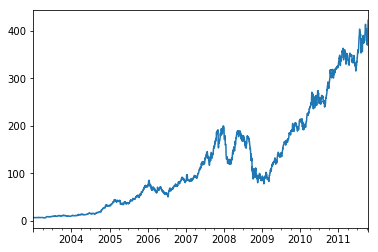

In [130]:
# Call plot on one of the columns to generate a simple ts plot

close_px['AAPL'].plot()

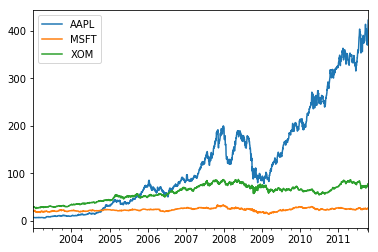

In [131]:
# Plot all stocks
close_px.plot()

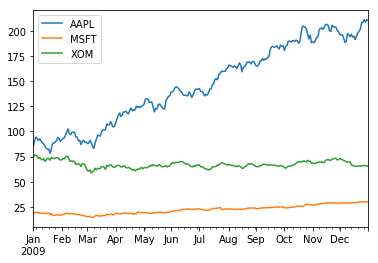

In [132]:
# Plot 2009
close_px.loc['2009'].plot()

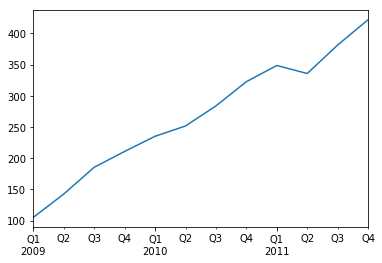

In [137]:
# Plot quarterly using resample

appl_q = close_px['AAPL'].resample('Q-DEC').ffill()  # resampling quarterly
appl_q.loc['2009':].plot()  # Plot 2009 onwards

### Moving Window Functions

**Moving window functions** involves sliding fixed-length window/moving averages or with exponentially decaying weights on ts.

`rolling_mean` casts a moving average based on a number of periods (window)

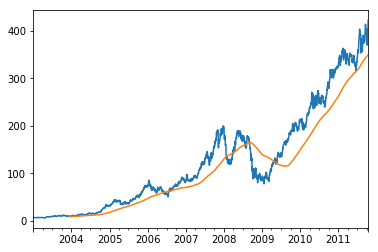

In [144]:
close_px.AAPL.plot()
close_px.AAPL.rolling(window=250, center=False).mean().plot()

# the moving window is only calculated after 250 days

In [145]:
close_px.AAPL.rolling(window=250, center=False).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15          NaN
2003-01-16          NaN
2003-01-17          NaN
2003-01-20          NaN
2003-01-21          NaN
2003-01-22          NaN
2003-01-23          NaN
2003-01-24          NaN
2003-01-27          NaN
2003-01-28          NaN
2003-01-29          NaN
2003-01-30          NaN
2003-01-31          NaN
2003-02-03          NaN
2003-02-04          NaN
2003-02-05          NaN
2003-02-06          NaN
2003-02-07          NaN
2003-02-10          NaN
2003-02-11          NaN
2003-02-12          NaN
                ...    
2011-09-05    338.19096
2011-09-06    338.57484
2011-09-07    338.95956
2011-09-08    339.34044
2011-09-09    339.68108
2011-09-12    340.03620
2011-09-13    340.42724
2011-09-14    340.83496
2011-09-15    341.27180
2011-09-16    341.74372
2011-09-19    34

To calculate an **expanding window mean**, we take a moving average of the entire ts length.

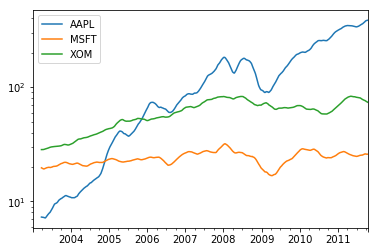

In [157]:
expanding_mean = lambda x: rolling(x, len(x), min_periods=1)
close_px.rolling(window=60).mean().plot(logy=True)  # Log y transformation

### Exponentially-weighted functions

Specify a constant decay factor to give more weight to more recent observations. There are several waysto specify the decay factor - a popular one is to use a **span**, which makes the result comparable to a simple MA window with window size equal to the span. 

Pros: Since an exponentially-weighted statistic places more weight on more recent obeservations, it "adapts" faster to changes compared with equal-weighted version

For example: We compare a 60-Day MA with an equally-weighted moving average of span=60

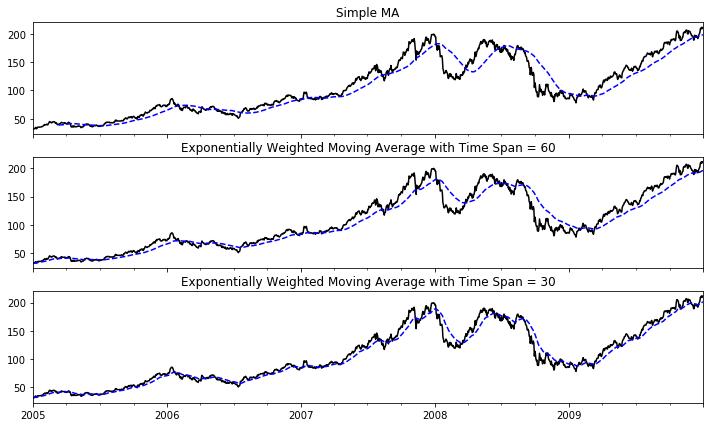

In [186]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize = (12,7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = aapl_px.rolling(window =60, min_periods=50).mean()

ewma60= aapl_px.ewm(span=60, min_periods=0).mean()

expma7= aapl_px.ewm(span=30, min_periods=0).mean()

aapl_px.plot(style='k-', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
aapl_px.plot(style='k-', ax=axes[2])

ma60.plot(style='b--', ax=axes[0])
ewma60.plot(style='b--', ax=axes[1])
expma7.plot(style='b--', ax=axes[2])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially Weighted Moving Average with Time Span = 60')
axes[2].set_title('Exponentially Weighted Moving Average with Time Span = 30')


### Binary Moving Window Functions

Stats like correlation or covariance needs to operate on 2 ts. Financial analysts are often interested in a stocks correlation to a benchmark (i.e. S&P 500). We can compuate that by computingthe %age change and using `rolling_corr`:

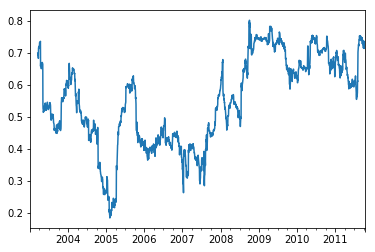

In [164]:
spx_rets = close_px_all.SPX / close_px_all.SPX.shift(1) -1 # S&P 500 percent change

returns = close_px.pct_change()

returns.AAPL.rolling(window= 125, min_periods=50).corr(other=spx_rets).plot() #starts at 50th day


# Correlation ts plot


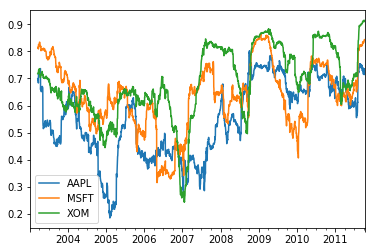

In [166]:
returns.rolling(window= 125, min_periods=50).corr(other=spx_rets).plot()